# Understanding Linear models

+ **Linear Models**
    + Linear Regression
    + Linear Classification
    + Logistic Regression

+ **Learning parameters of models**
    + Pseudo Inverse
    + Gradient Descent
    + Maximum Likelihood Estimation
    

## Linear Models

A linear model refers to a model that is a linear combination of the input variables.
$$ h(\vec{x}) = \vec{w} \cdot \vec{x}=\sum_{i=0} ^d w_i x_i$$
where $d$ denotes the number of coefficents/parameters of the model.

## Regression with a linear model

Let $\textbf{X} \in \mathbb{R}^{m \times d}$ and output $\vec{y} \in \mathbb{R}^m$ be given. We are interested in learning mapping from $\textbf{X}$ to $\vec{y}$. Learning such mapping presupposes that there exits $\vec{\beta}$ such that $\vec{\beta}^T \cdot \textbf{X} = \vec{y}$. Consequently, learning a mapping from $\textbf{X}$ to $\vec{y}$ correspond to approximating $\vec{w} \approx \vec{\beta}$. To this end, one often aims to minimize the sum of the squares of the discrepancy between the true values $\vec{y}$ and estimates $\vec{w} \cdot \textbf{X}$. This corresponds to solving least-squares problems:


$$ \text{minimize } ||\vec{w}\textbf{X} - \vec{y}||_2 ^2$$

#### Analytical solution:  
$\textbf{X}^\dagger = (\textbf{X}^T \textbf{X})^{-1} \textbf{X}^T $

$ \text{where  }  \textbf{X}^\dagger \text{is the }\textbf{pseudo-inverse } \text{of  }\textbf{X} \implies \vec{w}= \textbf{X}^\dagger \vec{y} $. Computation time proportional to $d^2 m$.


##### The mean squared error:

Given $ \textbf{X} $ and $\vec{y}$, The mean squared error measured by 
$$ E_{in} (\vec{w})=\frac{1}{m} ||\vec{w}\textbf{X} - \vec{y}||_2 ^2 $$



## Binary classification with a linear model

Lets assume that ouput vector is a binary vector rather than a continous one, i.e., $\vec{y} \in \{1,0\}^m$.
Consequently, we have to convert $\vec{w} \cdot \textbf{X}$ into binary values. To this end, let me introduce you a sigmod function


$$ Sigmoid(x)= \frac{1}{1+ e^{-x}}$$


##### The mean squared error:

Given $ \textbf{X} $ and $\vec{y}$, The mean squared error measured by 


$$ E_{in} (\vec{w})=\frac{1}{m} ||Sigmoid(\vec{w}\textbf{X}) - \vec{y}||_2 ^2$$


### How to minimize $E_{in}$ ?

+ With Least Squares

+ With Regularized Least Squares

+ With Sequential Learning/ on-line algorithms
    + Gradient Descent and its derivations    

### How to use the least squares to minimize $E_{in}$ ?


$$ E_{in} (w)= \frac{1}{N} ||\vec{w}\textbf{X} - \vec{y}||^2$$


### Pseudo Inverse


$$ \textbf{X}^T \textbf{X} \vec{w} = \textbf{X}^T \vec{y}$$


$$\textbf{X}^\dagger = (\textbf{X}^T \textbf{X})^{-1} \textbf{X}^T $$

$$ \text{where  }  \textbf{X}^\dagger \text{is the }\textbf{pseudo-inverse } \text{of  }\textbf{X} $$


$$\vec{w}= \textbf{X}^\dagger \vec{y} $$

### Regularized Least Squares

$$\vec{w}= \big ( \lambda \mathbf{I} + \textbf{X}^T \textbf{X} \big)^{-1} \mathbf{X}^T \mathbf{y} $$


## Gradient Descent Algorithm

First step of minimizing $E_{in}$ starts with taking derivative of it.
Loosely speaking, by taking derivative of $E_{in}$, we observe the rate of change,i.e., tweaking of $\vec{w}$ causes a change in $E_{in}$. Our goal is to find such $\vec{w}$ by tweaking so that $E_{in}$ can be close to 0.

$$ \nabla E_{in} (w) = \frac{2}{N} \textbf{X}^T (\vec{w}\textbf{X} - \vec{y}) = 0 $$

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
import math
import seaborn as sns
sns.set(style="darkgrid")
from sklearn.metrics import mean_squared_error
np.random.seed(2)

In [2]:
class DataGeneratingProcess(object):
    def __init__(self,f=lambda x: 5,noise=0):
        # This is the true unknown function we are trying to approximate
        self.f=f
        self.s=noise # noise variance.
        self.X=None
        self.y=None
    
    def generate_regression(self,N,T=(-4,4)):
        # Sample some input points and noisy versions of the function evaluated at  these points.
        self.X = np.random.uniform(T[0], T[1], size=(N,1))
        self.y = self.f(self.X) + self.s*np.random.randn(N)
        return self.X,self.y

    def generate_classification(self,N,T=(-4,4)):
        # Sample some input points and noisy versions of the function evaluated at  these points.
        self.X = np.random.uniform(T[0], T[1], size=(N,1))
        #TODO include noise latter
        self.y = self.f(self.X) #+ self.s*np.random.randn(N)
        return self.X,self.y
    
    def plot(self):
        plt.scatter(self.X, self.y)
        plt.xlabel('Observations')
        plt.ylabel('True function')
        plt.axis('tight')
        plt.axis([-4.5, 5, -5, 15])
        plt.show()

In [3]:
from abc import ABC
class BaseLinearModel(ABC):
    def __init__(self,num_epoch=100):
        self.weights=None
        self.num_epoch=num_epoch
        self.gradient_update=0.01


    def activation_func(self,x):
        return x
    
    def fit(self,X,y):
        pass

    def plot(self,X):
        plt.plot(X, self.weights[0] + self.weights[1]*X,c='r')# label='h(x) = %.2f + %.2f x' %(w[0], w[1]))
        plt.scatter(X, y)
        plt.xlabel('Observations')
        plt.ylabel('Predictions')
        plt.axis('tight')
        plt.show()

    
    def fit_by_pseudo_inverse(self,X,y):
        X=X.copy()
        y=y.copy()
        # 1s inserted into X as we have to also learn the intercept of function
        X_t = np.column_stack( (np.ones((len(X),1)) , X ) ) 
        self.weights = np.dot( np.linalg.pinv(X_t), y) # weights 
        print( 'w0 = %.6f, w1 = %.6f ' %(self.weights[0],self.weights[1]) ) 
        print('Mean squared Error of Least Squares: ',mean_squared_error(self.weights[0] + self.weights[1]*X,y))
        
        
    def fit_regularized_least_squares(self,X,y,lambda_=0):
        X=X.copy()
        y=y.copy()
        
        
        X_t = np.column_stack( (np.ones((len(X),1)) , X ) )
        I=np.identity(X_t.shape[1])

        pinv_scratc=np.linalg.inv(lambda_*I+np.dot(X_t.T,X_t)).dot(X_t.T)
        self.weights=np.dot(pinv_scratc,y)
        print( 'w0 = %.6f, w1 = %.6f ' %(self.weights[0],self.weights[1]) ) 
        print('Mean squared Error of Regularized Least Squares : ',mean_squared_error(self.weights[0] + self.weights[1]*X,y))
    
    
    def fit_gradient_descent(self,X,y):
        X,y=X.copy(),y.copy()
        
        X_t = np.column_stack( (np.ones((len(X),1)) , X ) ) 
        self.weights = np.dot( np.linalg.pinv(X_t), y)
            
        # initialize a list to store the loss value for each epoch
        lossHistory = []
        # loop over the desired number of epochs
        for epoch in np.arange(0, self.num_epoch):
            error = X_t.dot(self.weights) - y
            loss = np.sum(error ** 2)
            lossHistory.append(loss)
            gradient = X_t.T.dot(error) / X_t.shape[0]
            self.weights += -self.gradient_update * gradient
            
        self.weights=np.around(self.weights,5)
        print('Learned weights: ',self.weights)
    
    def predict(self,X):
        return self.weights[0] + self.weights[1]*X

    def fit_polynomial(self,X,y,d=3,plotting=False):
            X=X.copy()
            y=y.copy()

            print('Fitting polynomials ',d)
            p = np.poly1d(np.polyfit(X, y, d))
            print('Mean squared Error Logistic Regression: ',mean_squared_error(p(X),y))

            if plotting:
                plt.scatter(X, y)
                _=np.linspace(X.min(), X.max(), num=10)

                plt.plot(_, p(_),c='r')
                plt.xlabel('observations')
                plt.ylabel('Outputs')
                plt.axis('tight')
                plt.show()




class LinearModel(BaseLinearModel):
    def __init__(self,num_epoch=100):
        super().__init__(num_epoch)


## PseudoInverse

w0 = 5.000000, w1 = 0.000000 
Mean squared Error of Least Squares:  7.888609052210118e-31


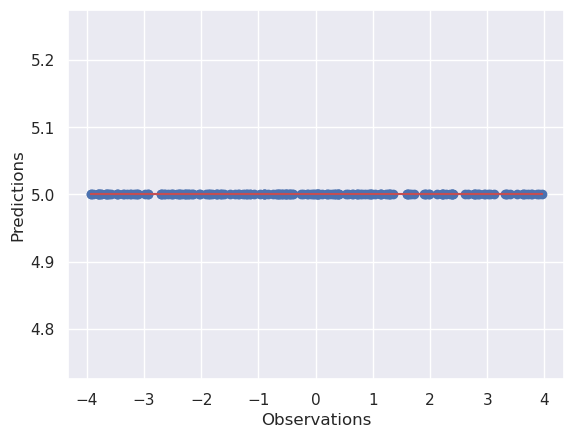

In [4]:
g=DataGeneratingProcess()
X,y=g.generate_regression(200)
model=LinearModel()
model.fit_by_pseudo_inverse(X,y)
model.plot(X)

w0 = -0.000000, w1 = 3.000000 
Mean squared Error of Least Squares:  6.786068325828112e-32


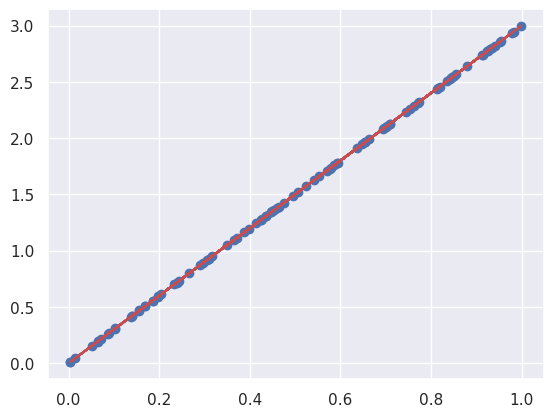

w0 = -0.195248, w1 = 1.042799 
Mean squared Error of Least Squares:  0.005395473737440716


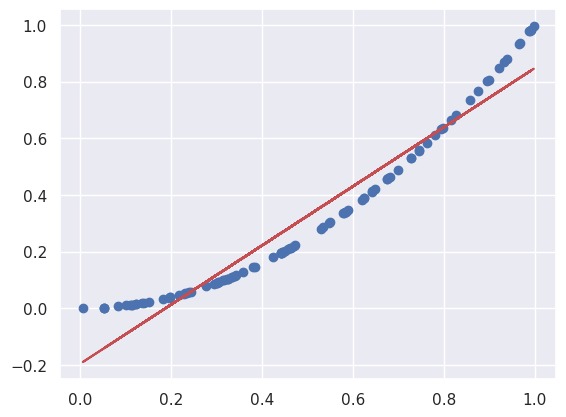

w0 = -0.222017, w1 = 0.955710 
Mean squared Error of Least Squares:  0.012226243341767095


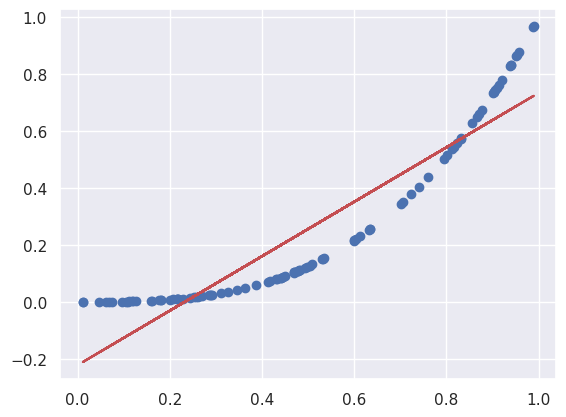

w0 = -0.205033, w1 = 0.802596 
Mean squared Error of Least Squares:  0.017239395283571594


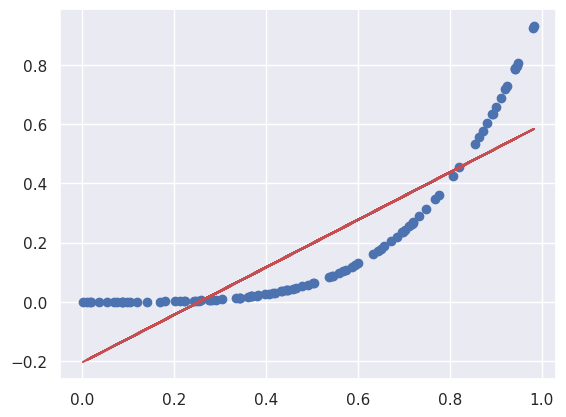

In [5]:
f = lambda x: (2*np.abs(x)+np.abs(x)).flatten()
X=np.random.random(100).reshape(100,1)
plt.scatter(X,f(X))
model=LinearModel()
model.fit_by_pseudo_inverse(X,f(X))
plt.plot(X, model.weights[0] + model.weights[1]*X,c='r')
plt.show()

##############################################################################################################


f = lambda x: (x**2).flatten()
X=np.random.random(100).reshape(100,1)
plt.scatter(X,f(X))

model=LinearModel()
model.fit_by_pseudo_inverse(X,f(X))
plt.plot(X, model.weights[0] + model.weights[1]*X,c='r')
plt.show()

##############################################################################################################

f = lambda x: (x**3).flatten()
X=np.random.random(100).reshape(100,1)
plt.scatter(X,f(X))

model=LinearModel()
model.fit_by_pseudo_inverse(X,f(X))
plt.plot(X, model.weights[0] + model.weights[1]*X,c='r')
plt.show()


##############################################################################################################

f = lambda x: (x**4).flatten()
X=np.random.random(100).reshape(100,1)
plt.scatter(X,f(X))

model=LinearModel()
model.fit_by_pseudo_inverse(X,f(X))
plt.plot(X, model.weights[0] + model.weights[1]*X,c='r')
plt.show()

## Reguiarlized Least Squared

w0 = 0.202573, w1 = 2.553621 
Mean squared Error of Regularized Least Squares :  0.016482711921738648


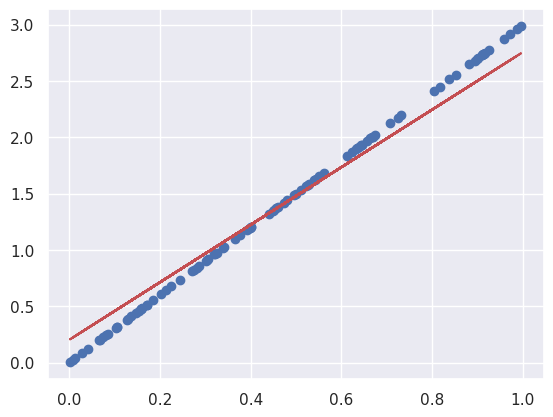

w0 = -0.178202, w1 = 1.015478 
Mean squared Error of Regularized Least Squares :  0.005334634581471146


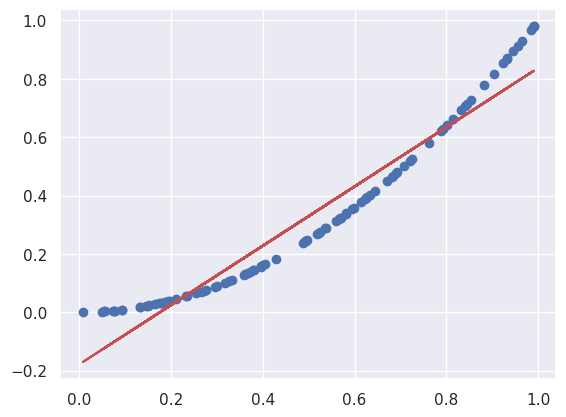

w0 = -0.225677, w1 = 0.981958 
Mean squared Error of Regularized Least Squares :  0.013974048790925666


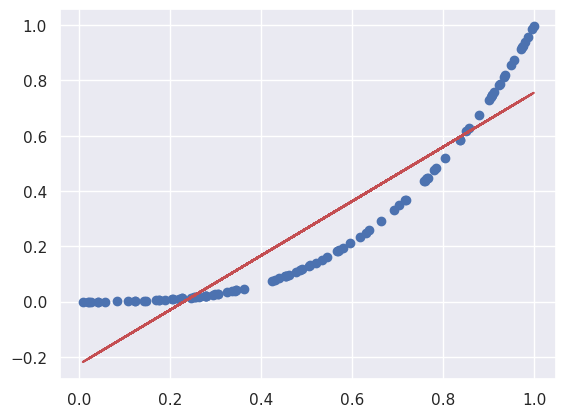

w0 = -0.186798, w1 = 0.832776 
Mean squared Error of Regularized Least Squares :  0.020709752774644458


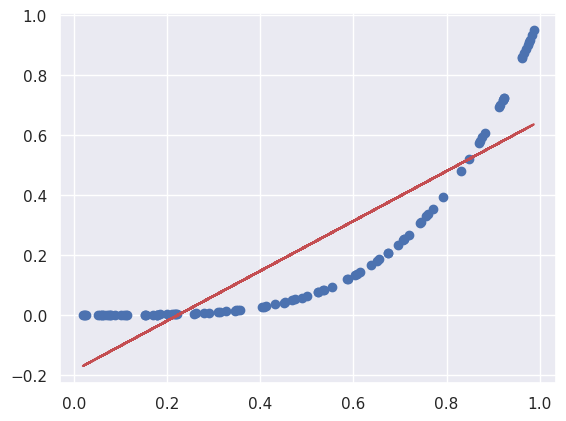

In [6]:
f = lambda x: (2*np.abs(x)+np.abs(x)).flatten()
X=np.random.random(100).reshape(100,1)
plt.scatter(X,f(X))
model=LinearModel()
model.fit_regularized_least_squares(X,f(X),lambda_=1.5)
plt.plot(X, model.weights[0] + model.weights[1]*X,c='r')
plt.show()

##############################################################################################################


f = lambda x: (x**2).flatten()
X=np.random.random(100).reshape(100,1)
plt.scatter(X,f(X))

model=LinearModel()
model.fit_regularized_least_squares(X,f(X))
plt.plot(X, model.weights[0] + model.weights[1]*X,c='r')
plt.show()

##############################################################################################################

f = lambda x: (x**3).flatten()
X=np.random.random(100).reshape(100,1)
plt.scatter(X,f(X))

model=LinearModel()
model.fit_regularized_least_squares(X,f(X))
plt.plot(X, model.weights[0] + model.weights[1]*X,c='r')
plt.show()


##############################################################################################################

f = lambda x: (x**4).flatten()
X=np.random.random(100).reshape(100,1)
plt.scatter(X,f(X))

model=LinearModel()
model.fit_regularized_least_squares(X,f(X))
plt.plot(X, model.weights[0] + model.weights[1]*X,c='r')
plt.show()

# Gradient Descent

Learned weights:  [-0.  3.]


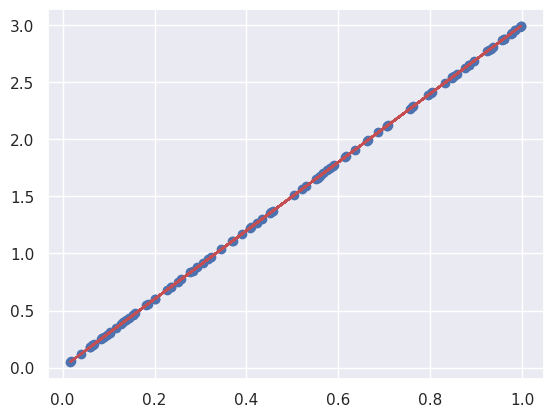

Learned weights:  [-0.13709  0.96118]


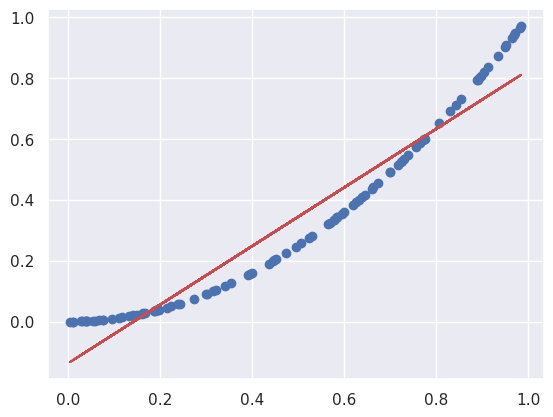

Learned weights:  [-0.18258  0.83798]


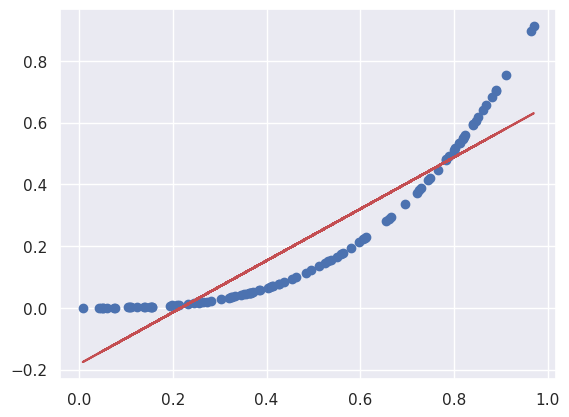

Learned weights:  [-0.2211   0.80494]


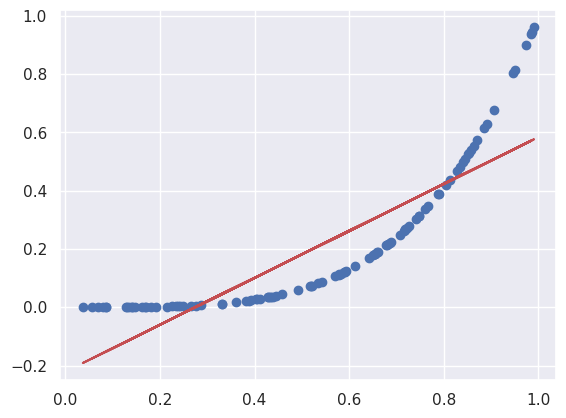

In [7]:
f = lambda x: (2*np.abs(x)+np.abs(x)).flatten()
X=np.random.random(100).reshape(100,1)
plt.scatter(X,f(X))
model=LinearModel()
model.fit_gradient_descent(X,f(X))
plt.plot(X, model.weights[0] + model.weights[1]*X,c='r')
plt.show()

##############################################################################################################


f = lambda x: (x**2).flatten()
X=np.random.random(100).reshape(100,1)
plt.scatter(X,f(X))

model=LinearModel()
model.fit_gradient_descent(X,f(X))
plt.plot(X, model.weights[0] + model.weights[1]*X,c='r')
plt.show()

##############################################################################################################

f = lambda x: (x**3).flatten()
X=np.random.random(100).reshape(100,1)
plt.scatter(X,f(X))

model=LinearModel()
model.fit_gradient_descent(X,f(X))
plt.plot(X, model.weights[0] + model.weights[1]*X,c='r')
plt.show()


##############################################################################################################

f = lambda x: (x**4).flatten()
X=np.random.random(100).reshape(100,1)
plt.scatter(X,f(X))

model=LinearModel()
model.fit_gradient_descent(X,f(X))
plt.plot(X, model.weights[0] + model.weights[1]*X,c='r')
plt.show()

# Regardless of the optimization technique we can go too far by fitting a linear model for nonlinear true func?

Learned weights:  [-0.16454  0.99382]


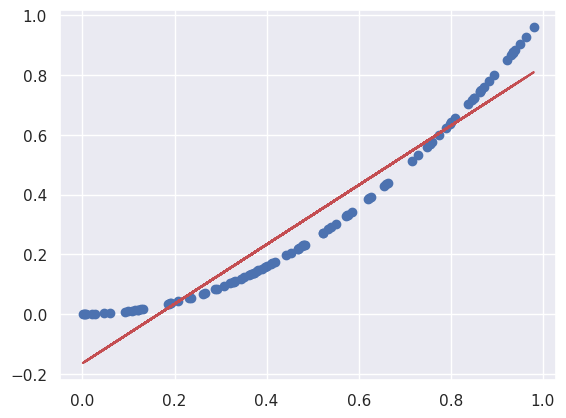

In [8]:
f = lambda x: (x**2).flatten()
X=np.random.random(100).reshape(100,1)
plt.scatter(X,f(X))


model=LinearModel()
model.fit_gradient_descent(X,f(X))
plt.plot(X, model.weights[0] + model.weights[1]*X,c='r')
plt.show()

# Fitting 1D polynomial on 2D poly. true func

Fitting polynomials  1
Mean squared Error Logistic Regression:  0.005851187517090167


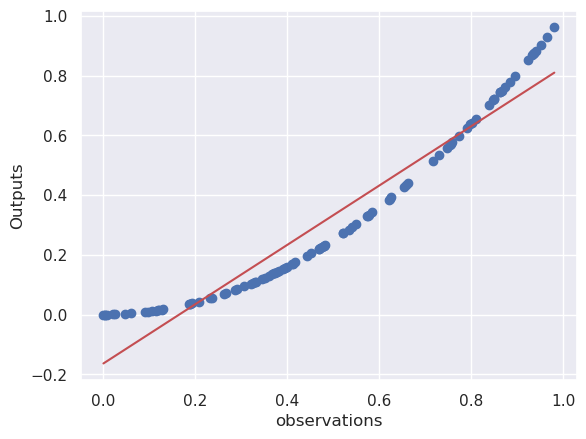

In [9]:
model=LinearModel()
model.fit_polynomial(X.copy().flatten(),f(X).copy(),d=1,plotting=True)

# Fitting 2D polynomial on 2D poly. true func

Fitting polynomials  2
Mean squared Error Logistic Regression:  7.814712363230792e-32


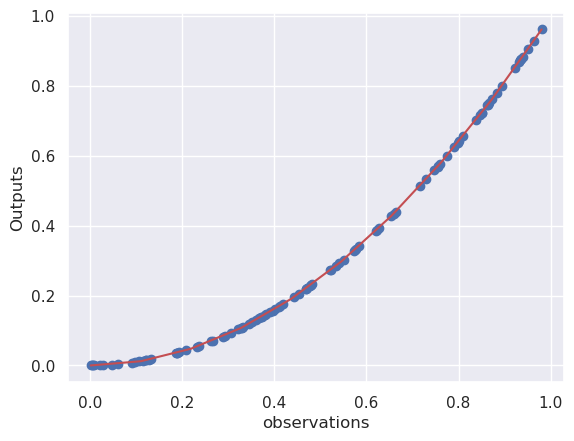

In [10]:
model=LinearModel()
model.fit_polynomial(X.copy().flatten(),f(X).copy(),d=2,plotting=True)

Fitting polynomials  2
Mean squared Error Logistic Regression:  2.545489869803735e-32


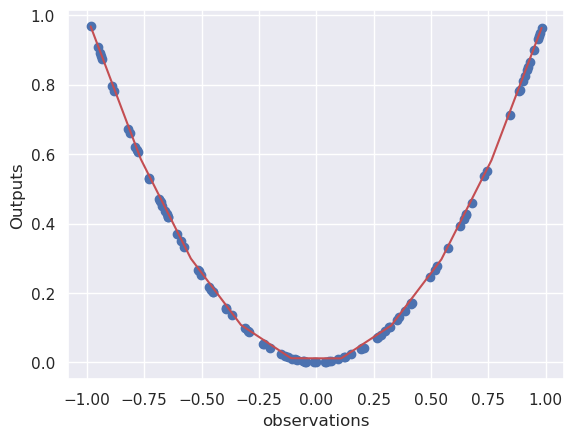

In [11]:
f = lambda x: (x**2).flatten()
X=np.random.uniform(-1, 1, size=(100,1))
model=LinearModel()
model.fit_polynomial(X.copy().flatten(),f(X).copy(),d=2,plotting=True)

Fitting polynomials  2
Mean squared Error Logistic Regression:  0.02313422388440115


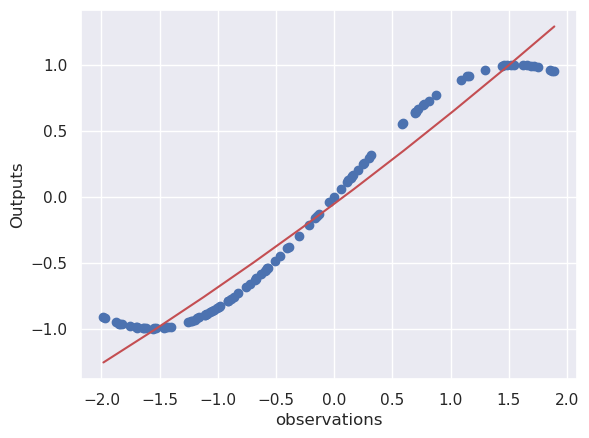

In [12]:
f = f = lambda x: (np.sin(x)).flatten()
X=np.random.uniform(-2, 2, size=(100,1))
model=LinearModel()
model.fit_polynomial(X.copy().flatten(),f(X).copy(),d=2,plotting=True)

Fitting polynomials  3
Mean squared Error Logistic Regression:  5.770450319774292e-05


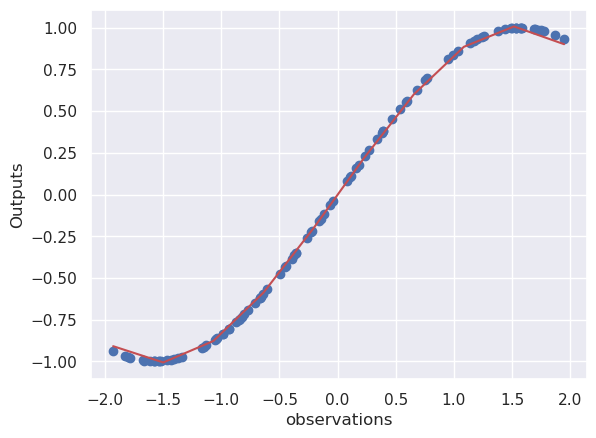

In [13]:
f = f = lambda x: (np.sin(x)).flatten()
X=np.random.uniform(-2, 2, size=(100,1))
model=LinearModel()
model.fit_polynomial(X.copy().flatten(),f(X).copy(),d=3,plotting=True)

Fitting polynomials  3
Mean squared Error Logistic Regression:  0.028919285683292238


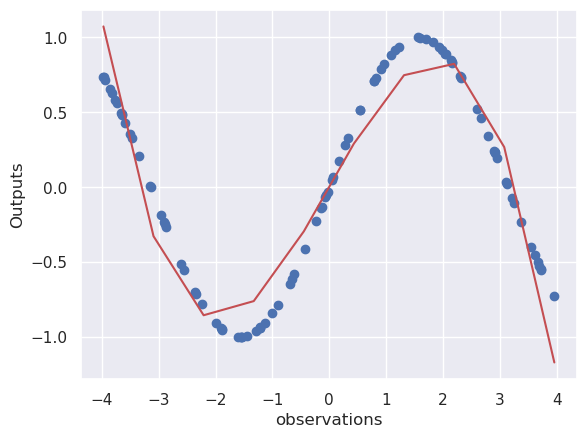

In [14]:
f = f = lambda x: (np.sin(x)).flatten()
X=np.random.uniform(-4, 4, size=(100,1))
model=LinearModel()
model.fit_polynomial(X.copy().flatten(),f(X).copy(),d=3,plotting=True)

#### TL,DR: the Goal is to approximate the function that generates the data.


# Gaussian comes into play.

$$ \mathcal{N}(x|\mu,\,\sigma^{2}) =\frac{1}{\sqrt{2 \pi \sigma^2}} \mathbf{e}^{-\frac{1}{2\sigma^2}(x-\mu)^2}$$ where  
+ $\mu$ is expected value/mean
+ $\sigma$ is standard devation of mean
+ $\sigma^2$ is the variance.
+ The recoprocal of the variance as $\beta=\frac{1}{\sigma^2}$ is called the precision.

From the from above, we see that the Gaussian distribution satisfies

$$ \mathcal{N}(x|\mu,\sigma^2) > 0$$ which is also shown below


+ the Gaussian is normalized so that following holds;

$$ \int_{-\infty} ^{+\infty} \mathcal{N}(x|\mu,\sigma^2) \, dx=1$$

So, we can find expectations of functions of $x$ under the Gaussian distribution. In particular, the average value of $x$ is given by

$$\mathbb{E}[x]= \int_{-\infty} ^{+\infty} \mathcal{N}(x|\mu,\sigma^2) \, x \, dx=\mu $$

Similarly, for the second order, following holds;

$$\mathbb{E}[x^2]= \int_{-\infty} ^{+\infty} \mathcal{N}(x|\mu,\sigma^2) \, x^2 \, dx=\mu^2 + \sigma^2$$

Hence, the variance of $x$ is given by

$$ var[x]= \mathbb{E}[x^2]+ \mathbb{E}[x]^2=\sigma^2$$

## Multi-variated Gaussian
The Gaussian distribution defined over a D-dimensional vector $x$ of continous variables is given by 


$$ \mathcal{N}(x|\boldsymbol{\mu},\, \mathbf{\Sigma}) =\frac{1}{\sqrt{(2 \pi)^{D/2} |\mathbf{\Sigma}|^{1/2} }} \, \mathbf{exp} \Big\{-\frac{1}{2}(x-\boldsymbol{\mu})^T  \mathbf{\Sigma}^{-1} \big(x- \boldsymbol{\mu} \big) \Big \}$$ 

where the D-dimensional vector $\boldsymbol{\mu}$ is called the mean, the $D \times D $ matrix $\boldsymbol{\Sigma}$ is called the covariance and $|\boldsymbol{\Sigma}|$ denotes the determinal of $\boldsymbol{\Sigma}$



# Let's see how Gaussian is related to Linear models


Suppose that we have a data set of observations $\mathbf{x}=(x_1,...,2_N)^T$ each of wich is a scalar variable $x$. We shall suppose that the observations are drawn independently from a Gaussian distribution whose mean $\mu$ and variance $\sigma^2$ are unknown. We would like to determine these parameters from the data set.



Data points that are drawn independently from the same distribution are said to be independent and identically distributed, which is often abbreviated to i.i.d. 

We have seen that the joint probability of two independent events is given by the product of the marginal probabilities for each event separately. 

Because our data set $x$ is i.i.d., we can therefore write the probability of the data set, given $\mu$ and $\sigma^2$, in the form

$$ p(\mathbf{x} | \mu,\sigma^2)=\prod_{n=1} ^N \mathcal{N}(x_n | \mu, \sigma^2)$$

One common criterion for determining the parameters in a probability distribution using an observed data set is to find the parameter values that maximize the likelihood function. For now our goal is to find such $\mu$ and $\sigma^2$ so that $p(\mathbf{x} | \mu,\sigma^2)$ is maximized.
So the goal is to determine values for the unknown parameters
$\mu$ and $\sigma^2$ in the Gaussian by maximizing the likelihood function written above.





## The likelihood for liner regression


Let us assume that, given the value of $x$, the corresponding value of t has a Gaussian distribution with a mean equal to the value $y(x,w)$.
Let us assume that each label $t_i$ is Gaussian distributed with mean 

$$ p(t|x,w,\beta) = \mathcal{N}(t | y(x,w),\beta^{-1})$$

where $\beta$ is the inverse variance of the distribution,i.e., $\beta=\frac{1}{\sigma^2}$ called the precision.


The goal is to to determine the values of the unknown
parameters $w$ and $\beta$ by maximum likelihood. If the data are assumed to be drawn independently from the distribution then the likelihood function is given by


$$ p(\mathbf{t}|\mathbf{x},\mathbf{w},\beta)=\prod_{n=1} ^N \mathcal{N} \big ( t_n \, | \,  y(x_n ,\mathbf{w}), \beta^{-1} \big) $$.



$$ ln \, p (\mathbf{t}|\mathbf{x},\mathbf{w},\beta)= -\frac{\beta}{2} \sum_{n=1} ^N \{ y(x_n,\mathbf{w})-t_n\}^2 + \frac{N}{2}ln \, (\beta) - \frac{N}{2} ln (2\pi) $$ 


Consider first the determination of the maximum likelihood solution for the polynomial coefficents, $\mathbf{w}_{ML}$. $\mathbf{w}_{ML}$ determined by maximizing above equation with respect to $\mathbf{w}$. 

+ Hence we can omit $\frac{N}{2}ln(\beta)$ and $- \frac{N}{2}ln(2\pi)$ as they do not depend on $\mathbf{w}$.


$$ ln \, p (\mathbf{t}|\mathbf{x},\mathbf{w},\beta)= -\frac{\beta}{2} \sum_{n=1} ^N \{ y(x_n,\mathbf{w})-t_n\}^2$$ 

+ We note that scaling the log likelihood by a positive constant coefficent does not alter the location of the maximim with respect to $w$ and so we can replace the coeffocent $\beta /2$ with $1/2$.






$$ ln \, p (\mathbf{t}|\mathbf{x},\mathbf{w},\beta)= -\frac{1}{2} \sum_{n=1} ^N \{ y(x_n,\mathbf{w})-t_n\}^2$$ 



+ Finally instead of maximizin the log likelihood we can equivalently minimize the negative log likelihood.

$$E_D (\mathbf{w})= \frac{1}{2} \sum_{n=1} ^N \{y(x_n \mathbf{w})-t_n) \}^2$$


Maximizing likelihood is equivalent, so far as to detemrmining w is concerned, to minimizing the sum of squares error function.







The gradient of the log likelihood function takes the following form

$$ \, \frac{\partial ln \, p (\mathbf{t}|\mathbf{x},\mathbf{w},\beta)}{\partial W}=  \sum_{n=1} ^{N} \{t_n - \mathbf{w}^T  x_n\} x_n ^T$$

Setting the gradient to zero gives us


$$ 0= \sum_{n=1} ^{N} t_n x_n^T - w^T \big( \sum_{n=1} ^{N} x_n x_n^T \big)$$

Solving for $\mathbf{w}$ we obtain

$$ \mathbf{w}_{ML}= ( \mathbf{x}^T \mathbf{x} )^{-1} \mathbf{x} ^T \mathbf{t} $$

The quantitiy is known as the Moore-Pensore pseudo-inverse of the matrix $\mathbf{x}$.


## The likelihood for liner regression

Let us assume that each label $y_i$ is Gaussian distributed with mean $\mu=w^T x_i$ and variance $\sigma^2$.

$$ y_i=\mathcal{N}(w^T x_i,\sigma^2)$$
$$ y_i=w^T x_i+\mathcal{N}(0,\sigma^2)$$




$$ \mathbf{P}(Y|X,\Theta)= \mathcal{N}(y|\mu(x),\sigma^2(x))$$In the simplest case, we assume $\mu$ is a linear function of $x$, $\mu=w^Tx$ and $\Theta=(w,\sigma^2)$. For example, suppose the input is 1 dimensional and we can represent the expected respond as follows: 

$$ \mu(x)=w_0 + w_1 x = w^T x$$ where $w_0$ is the intercept or bias term while w_1 the slope hence x=(1,x) above.

hence

$$ \mathbf{P}(Y|X,\Theta)= \prod_{i=1} ^n \mathbf{P}(y_i |x_i,\Theta)$$


+ Goal is to ***tweak*** $\Theta$ so that probabilitiy of observing responses $Y$ given a dataset $X$ and $\Theta$ is maximized.




As we assume that each data point comes from Gaussian distribution, we multuply gaussian probabties of each point as follows

***equivalently*** likelihood function is in the following form
$$\mathbf{P}(Y|X,\vec{w},\sigma) = \prod_{i=1} ^n \frac{1}{\sqrt{2 \pi \sigma^2}} \mathbf{e}^{-\frac{1}{2\sigma^2}(y_i- w^T x_i)^2}$$
where $w^T x_i=\mu(x_i)$







It is very similar to cost function $ J(\vec{w})=\sum_{i=1} ^n (y_i - w^T x_i)^2 $. 

+ Hence, as we maximize the likelihood function, we minimize cost function



Moreover, we could write everything in matrix notation as follows 

$$= \prod_{i=1} ^n (2\pi \sigma^2)^{-1/2} \, \mathbf{e}^{-\frac{1}{2\sigma^2}(y_i- w^T x_i)^2}$$


$$= (2\pi \sigma^2)^{-n/2} \, \mathbf{e}^{-\frac{1}{2\sigma^2}\sum_{i=1}(y_i- w^T x_i)^2}$$

$$\mathbf{P}(Y|X,w,\sigma) = (2\pi \sigma^2)^{-n/2} \, \mathbf{e}^{-\frac{1}{2\sigma^2}(Y- w^T X)^T (Y- w^T X)}$$

When we see the data, we do not known the true parameters $\vec{w}$,
but any guess at them gives us a probability density. Hence we aim to increase the probabilitiy densitiy function or ***increase the likelyhood***. Due to mathematical convenient ( not multplying very small probabilities), we work with ***log-likelihood*** function as log is monotonic function.


$$\mathcal{L}(w,\sigma) = \sum_{i=1} ^n log \mathbf{P}(y_i |x_i,\vec{w},\sigma)$$


$$\mathcal{L}(w,\sigma)= - \frac{n}{2}log2\pi -n log(\sigma) - \frac{1}{2 \sigma^2} \sum_{i=1} ^n (y_i-(\vec{w}^T x_i))^2$$

The maximum likelihood of $w$ is
$$\mathcal{L}(w,\sigma)= - \frac{n}{2}log(2\pi\sigma^2)- \frac{1}{2 \sigma^2} \big(Y-(\vec{w}^T X)\big) \big(Y-(\vec{w}^T X) \big)$$

if you take the derivation of the above function with respect to w

$$ \frac{\partial \mathcal{L(W)}}{\partial W}=0 - \frac{1}{2\sigma^2}
[0-2X^T Y + 2X^T X W] $$

equating to 0 gives us $w_{ML}=(X^TX)^{-1}X^TY$


$$ \frac{\partial \mathcal{L(\sigma)}}{\partial \sigma}=1/n \sum_{i=1} ^n (y_i-w^T x_i)^2$$




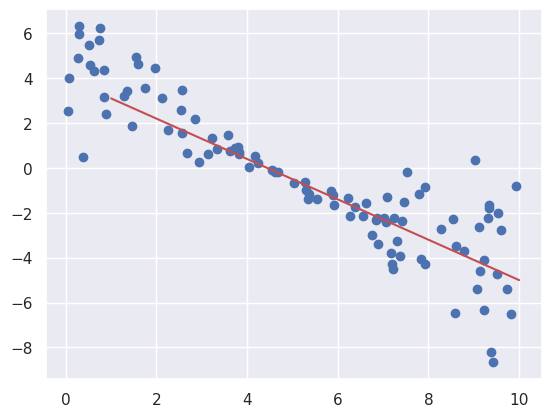

TRUE func: -0.9 4.0 0.5


In [15]:

# Choose the "true" parameters.
m_true = -0.9
b_true = 4.0
f_true = 0.5

# Generate some synthetic data from the model.
N = 100
X = np.sort(10*np.random.rand(N))
y = m_true*X+b_true


y+=np.abs(f_true*y) * np.random.randn(N)
yerr = 0.01+0.001*np.random.rand(N)
y += yerr * np.random.randn(N)

points=np.linspace(1, 10, num=1000)
plt.scatter(X,y)
plt.plot(points,m_true*points+b_true,c='r')
plt.show()

print('TRUE func:',m_true,b_true,f_true)

In [16]:
A = np.vstack((np.ones_like(X), X)).T
C = np.diag(yerr * yerr)
A[:5]

array([[1.        , 0.053337  ],
       [1.        , 0.08030547],
       [1.        , 0.27135715],
       [1.        , 0.29437191],
       [1.        , 0.29905562]])

In [17]:
cov = np.linalg.inv(np.dot(A.T, np.linalg.solve(C, A)))

b_ls, m_ls = np.dot(cov, np.dot(A.T, np.linalg.solve(C, y)))

m_ls,b_ls

(-0.9592312432423588, 4.574909587595467)

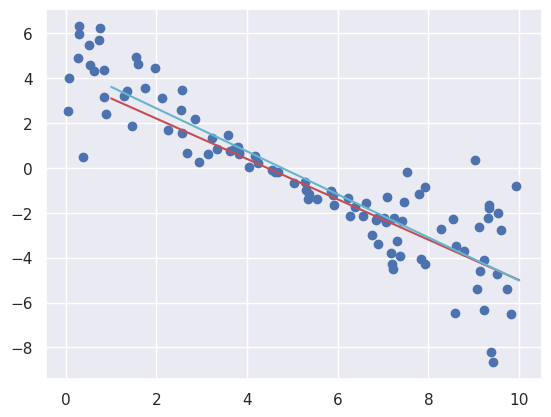

In [18]:
points=np.linspace(1, 10, num=1000)
plt.scatter(X,y)
plt.plot(points,m_true*points+b_true,c='r')
plt.plot(points,m_ls*points+b_ls,c='c')

In [19]:
def lnlike(theta, x, y, yerr):
    m, b, lnf = theta
    model = m * x + b
    inv_sigma2 = 1.0/(yerr**2 + model**2*np.exp(2*lnf))
    return -0.5*(np.sum((y-model)**2*inv_sigma2 - np.log(inv_sigma2)))

import scipy.optimize as op
nll = lambda *args: -lnlike(*args)
result = op.minimize(nll, [m_true, b_true, np.log(f_true)], args=(X, y, yerr))
m_ml, b_ml, lnf_ml = result["x"]

In [20]:
m_ml,b_ml,lnf_ml

(-1.0032698160724811, 4.486228588700645, -0.8228390797213224)

In [21]:
print('TRUE func:',m_true,b_true,f_true)

TRUE func: -0.9 4.0 0.5
